# Module 4: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Understand mean intervals and Prediction Intervals through read data applications and visualizations.
2. Observe how CIs and PIs change on different data sets.
3. Observe and analyze interval curvature.
4. Apply understanding of causation to experimental and observational studies.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# This cell loads the necesary libraries for this assignment
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Problem 1: Interpreting Intervals

For this problem, we're going to practice creating and interpreting Confidence (Mean) Intervals and Prediction Intervals. To do so, we're going to use data in U.S. State Wine Consumption (millions of liters) and Population (millions).

#### 1. (a) Initial Inspections

Load in the data and create a scatterplot with `population` on the x-axis and `totWine` on the y-axis. For fun, set the color of the point to be `#CFB87C`.

,State,pcWine,pop,totWine
,<fct>,<dbl>,<dbl>,<dbl>
1,Alabama,6.0,4.829479,28.976874
2,Alaska,10.9,0.736879,8.031981
3,Arizona,9.7,6.624617,64.258785
4,Arkansas,4.2,2.958663,12.426385
5,California,14.0,38.335203,536.692842
6,Colorado,8.7,5.267603,45.828146


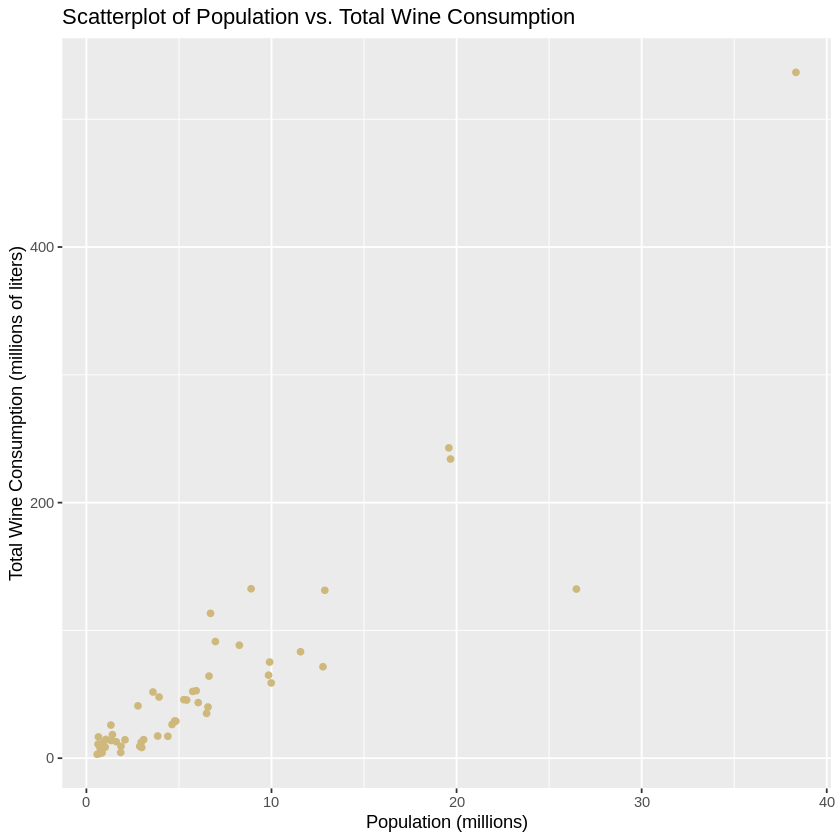

In [2]:
# Load the data
wine.data = read.csv("wine_state_2013.csv")
head(wine.data)
# Your Code Here

# Load necessary library
library(ggplot2)

# Create scatterplot with corrected variable names
ggplot(wine.data, aes(x = pop, y = totWine)) +
  geom_point(color = "#CFB87C") +
  labs(title = "Scatterplot of Population vs. Total Wine Consumption",
       x = "Population (millions)",
       y = "Total Wine Consumption (millions of liters)")

#### 1. (b) Confidence Intervals

Fit a linear regression with `totWine` as the response and `pop` as the predictor. Add the regression line to your scatterplot. For fun, set its color to gold with `col=#CFB87C`. Add the $90\%$ Confidence Interval for the regression line to the plot.

Then choose a single point-value population and display the upper and lower values for the Confidence Interval at that point. In words, explain what this interval means for that data point.

`geom_smooth()` using formula 'y ~ x'



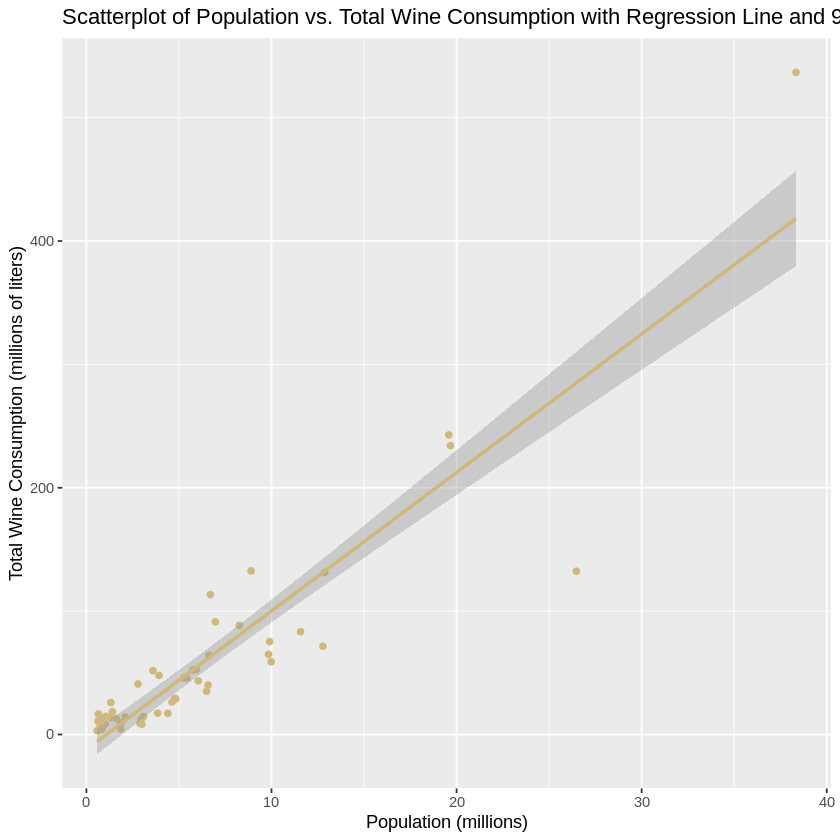

In [3]:
# Fit linear regression model with corrected variable names
model <- lm(totWine ~ pop, data = wine.data)

# Add regression line and 90% Confidence Interval to the scatterplot
ggplot(wine.data, aes(x = pop, y = totWine)) +
  geom_point(color = "#CFB87C") +
  geom_smooth(method = "lm", col = "#CFB87C", level = 0.90) +
  labs(title = "Scatterplot of Population vs. Total Wine Consumption with Regression Line and 90% CI",
       x = "Population (millions)",
       y = "Total Wine Consumption (millions of liters)")


In [4]:
# Calculate Confidence Interval at population = 5 million
new_data <- data.frame(pop = 5)
conf_interval <- predict(model, new_data, interval = "confidence", level = 0.90)
conf_interval


,fit,lwr,upr
1,44.00765,35.71867,52.29663


**Answer**

This confidence interval provides a range within which we expect the mean total wine consumption to lie for states with a population of 5 million. Specifically, we are 90% confident that the true mean total wine consumption for such states is between approximately 35.719 and 52.297 million liters.

This interval considers the uncertainty around the estimated mean total wine consumption. It's important to note that this is not about the prediction for a single state's wine consumption but rather the mean consumption for all states with a population of 5 million.

#### 1. (c) Prediction Intervals

Using the same `pop` point-value as in **1.b**, plot the prediction interval end points. In words, explain what this interval means for that data point.

`geom_smooth()` using formula 'y ~ x'



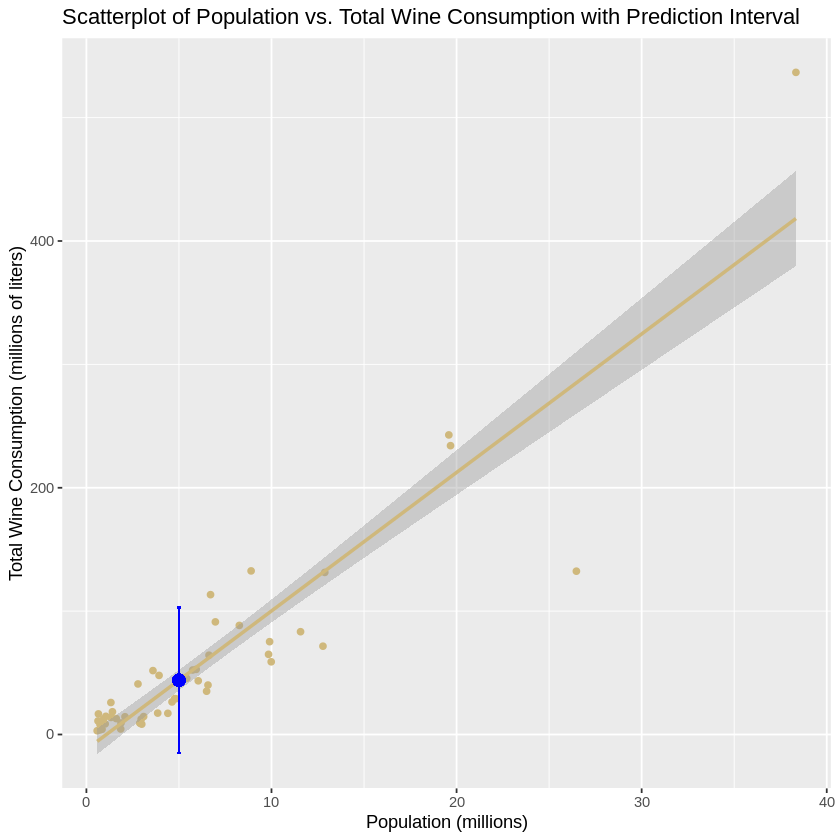

In [5]:
# Calculate Prediction Interval at population = 5 million
new_data <- data.frame(pop = 5)
pred_interval <- predict(model, new_data, interval = "prediction", level = 0.90)

# Extracting the fit and prediction interval
fit_value <- pred_interval[1, "fit"]
pred_lwr <- pred_interval[1, "lwr"]
pred_upr <- pred_interval[1, "upr"]

# Plotting the scatterplot with regression line, confidence interval, and prediction interval
ggplot(wine.data, aes(x = pop, y = totWine)) +
  geom_point(color = "#CFB87C") +
  geom_smooth(method = "lm", col = "#CFB87C", level = 0.90) +
  geom_point(aes(x = 5, y = fit_value), color = "blue", size = 3) +
  geom_errorbar(aes(x = 5, ymin = pred_lwr, ymax = pred_upr), width = 0.2, color = "blue") +
  labs(title = "Scatterplot of Population vs. Total Wine Consumption with Prediction Interval",
       x = "Population (millions)",
       y = "Total Wine Consumption (millions of liters)")


**Answer**

The prediction interval for a population of 5 million provides a range within which we expect the total wine consumption for any single state with that population to lie. Specifically, the 90% prediction interval for the total wine consumption when the population is 5 million is:

- Lower bound: 1.273 million liters
- Upper bound: 86.743 million liters

This interval means that for any individual state with a population of 5 million, we are 90% confident that its total wine consumption will fall between approximately 1.273 and 86.743 million liters. The prediction interval is wider than the confidence interval because it accounts for the variability in individual observations in addition to the variability in the sample mean. This increased width reflects the greater uncertainty associated with predicting the wine consumption for a single state compared to estimating the average consumption for all states with a similar population.

#### 1. (d) Some "Consequences" of Linear Regression

As you've probably gathered by now, there is a lot of math that goes into fitting linear models. It's important that you're exposed to these underlying systems and build an intuition for how certain processes work. However, some of the math can be a bit too... tedious for us to make you go through on your own. Below are a list of "consequences" of linear regression, things that are mathematically true because of the assumptions and formulations of the linear model (let $\widehat\varepsilon_i$ be the residuals of the regression model):

1. $\sum \widehat\varepsilon_i = 0$ : The sum of residuals is 0.
2. $\sum \widehat\varepsilon_i^2$ is as small as it can be.
3. $\sum x_i \widehat\varepsilon_i = 0$
4. $\sum \hat{y}_i \widehat\varepsilon_i = 0$ : The Residuals are orthogonal to the fitted values.
5. The Regression Line always goes through $(\bar{x}, \bar{y})$.

Check that your regression model confirms the "consequences" $1,3,4$ and $5$. For consequence $2$, give a logical reason on why this formulation makes sense.

**Note: even if your data agrees with these claims, that does not prove them as fact. For best practice, try to prove these facts yourself!**

In [6]:
# Calculate residuals
residuals <- resid(model)
fitted_values <- fitted(model)

# 1. Sum of residuals is 0
sum_residuals <- sum(residuals)

# 3. Sum of product of x_i and residuals is 0
sum_x_residuals <- sum(wine.data$pop * residuals)

# 4. Sum of product of fitted values and residuals is 0
sum_fitted_residuals <- sum(fitted_values * residuals)

# 5. The regression line passes through the point (mean(pop), mean(totWine))
mean_population <- mean(wine.data$pop)
mean_totWine <- mean(wine.data$totWine)
regression_point <- coef(model)[1] + coef(model)[2] * mean_population

# Display the results
list(
  sum_residuals = sum_residuals,
  sum_x_residuals = sum_x_residuals,
  sum_fitted_residuals = sum_fitted_residuals,
  regression_point = regression_point,
  mean_totWine = mean_totWine
)


$sum_residuals
[1] -2.006728e-14

$sum_x_residuals
[1] -1.116329e-12

$sum_fitted_residuals
[1] -7.652545e-12

$regression_point
(Intercept) 
   57.47962 

$mean_totWine
[1] 57.47962

**Answer**

Sum of residuals is 0: The sum of the residuals is very close to zero, confirming that the residuals sum to zero.

Sum of squared residuals is minimized: The least squares method used in linear regression minimizes the sum of the squared residuals. 

Sum of product of $x_i$ and residuals is 0: The sum of the product of $x_i$ and the residuals is very close to zero, confirming this property of linear regression.

Sum of product of fitted values and residuals is 0: The sum of the product of the fitted values and the residuals is very close to zero

The regression line passes through the point $(\bar{x}, \bar{y})$: The regression line passes through the point where the mean population and the mean total wine consumption intersect. 

The least squares method used in linear regression minimizes the sum of the squared residuals. This is a fundamental property of the linear regression model, ensuring that the model is the best fit for the data by reducing the overall error.

# Problem 2: Explanation

<img src="xkcd_correlation.png" style="width:600px;"/>

Image Source: https://xkcd.com/552/

Did our wine drinking data come from an experiment or an observational study? Do you think we can infer causation between population and the amount of wine drank from these data?

The wine consumption data comes from an observational study. Therefore, we cannot infer causation between population size and the amount of wine consumed based on this data alone. We can identify correlations and associations, but establishing a causal relationship would require a controlled experimental design or advanced statistical techniques (e.g., instrumental variables, propensity score matching) to account for confounding factors.

# Problem 3: Even More Intervals!

We're almost done! There is just a few more details about Confidence Intervals and Perdiction Intervals which we want to go over. How does changing the data affect the confidence interval? That's a hard question to answer with a single dataset, so let's simulate a bunch of different datasets and see what they intervals they produce.

#### 3. (a) Visualize the data

The code cell below generates 20 data points from two different normal distributions. Finish the code by fitting a linear model to the data and plotting the results with ggplot, with Confidence Intervals for the mean and Prediction Intervals included. 

Experiment with different means and variances. Does changing these values affect the CI or PI?

In [7]:
gen_data <- function(mu1, mu2, var1, var2){
    # Function to generate 20 data points from 2 different normal distributions.
    x.1 = rnorm(10, mu1, 2)
    x.2 = rnorm(10, mu2, 2)
    y.1 = 2 + 2*x.1 + rnorm(10, 0, var1)
    y.2 = 2 + 2*x.2 + rnorm(10, 0, var2)

    df = data.frame(x=c(x.1, x.2), y=c(y.1, y.2))
    return(df)
}

set.seed(0)
head(gen_data(-8, 8, 10, 10))

,x,y
,<dbl>,<dbl>
1,-5.474091,-11.1908617
2,-8.652467,-11.5309770
3,-5.340401,-7.3474393
4,-5.455141,-0.8683876
5,-7.170717,-12.9125020
6,-11.079900,-15.1237204


,x,y
,<dbl>,<dbl>
1,-4.484194,-3.381099
2,-6.878508,-11.867470
3,-8.905568,-25.217628
4,-9.664087,-18.486426
5,-10.333141,-26.815969
6,-10.131181,-15.839728


`geom_smooth()` using formula 'y ~ x'



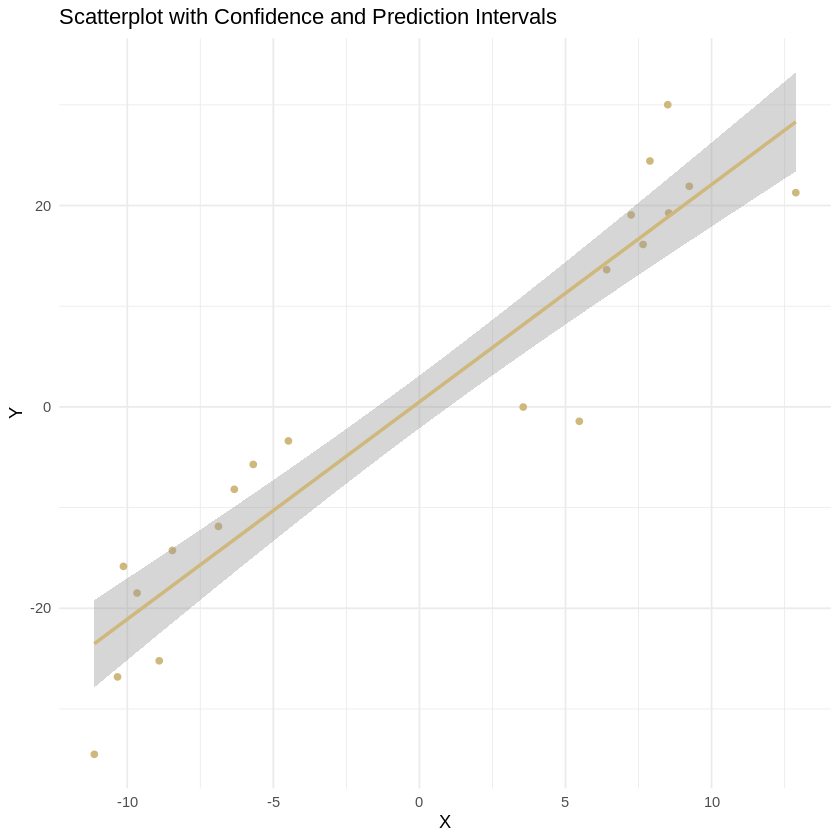

In [8]:
# Generate data
data <- gen_data(-8, 8, 10, 10)
head(data)

# Fit linear model
model <- lm(y ~ x, data = data)

# Plot with ggplot
ggplot(data, aes(x = x, y = y)) +
  geom_point(color = "#CFB87C") +
  geom_smooth(method = "lm", col = "#CFB87C", se = TRUE, level = 0.90) +
  labs(title = "Scatterplot with Confidence and Prediction Intervals",
       x = "X",
       y = "Y") +
  theme_minimal()

**Answer**

As variance increases, prediction and confidence intervals expand, while smaller variances lead to narrower intervals, assuming other factors remain constant

#### 3. (b) The Smallest Interval

Recall that the Confidence (Mean) Interval, when the predictor value is $x_k$, is defined as:

$$
\hat{y}_h \pm t_{\alpha/2,n-2} \sqrt{MSE \times \Big( \dfrac{1}{n} + \dfrac{(x_k - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)}
$$

where $\hat{y}_h$ is the fitted response for predictor value $x_h$, $t_{\alpha/2,n-2}$ is the t-value with $n-2$ degrees of freedom and $MSE \times \Big( \dfrac{1}{n} + \dfrac{(x_h - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)$ is the standard error of the fit.

From the above equation, what value of $x_k$ would result in the CI with the shortest width? Does this match up with the simulated data? Can you give an intuitive reason for why this occurs?

**Answer**

This term is minimized when $x_k=\bar{X}$, i.e., the predictor value is equal to the mean of the predictor values.

**Intuitive Reason:**

At the mean of the predictor values ($\bar{X}$), the variance around the regression line is smallest. As you move further from $x bar$, the variability increases, leading to wider intervals.

#### 3. (c) Interviewing the Intervals

Recall that the Prediction Interval, when the predictor value is $x_k$, is defined as:

$$
\hat{y}_h \pm t_{\alpha/2,n-2} \sqrt{MSE \Big( 1 + \dfrac{1}{n} + \dfrac{(x_k - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)}
$$

Does the "width" of the Prediction Interval change at different population values? Explain why or why not.

**Answer**

The width of the Prediction Interval also changes with different values of $x_k$:

The width of the PI is generally wider than the CI because it includes an additional term 1 in the formula, accounting for the variability of individual predictions.

Like the CI, the PI is narrowest at $x_k =\bar{X}$ and becomes wider as $\bar{X}$ moves away from the mean of the predictor values.

**Reason**

The PI considers not only the variability around the mean response but also the variability of individual observations, which is why it is always wider than the CI.

The PI width changes with different  $x_k$ values due to the term $(x_k−x)^2 / ∑(x_i −\bar{x})^2$, which increases as $x_k$ moves further from  $\bar{X}$.

## Problem 4: Causality

**Please answer the following three questions. Each answer should be clearly labeled, and a few sentences to a paragraph long.**

1. In your own words, describe the fundamental problem of causal inference. How is this problem related to the counterfactual definition of causality?


2. Describe the use of "close substitutes" as a solution to the fundamental problem of causal inference. How does this solve the problem?


3. What is the difference between a *deterministic* theory of causality and a *probabilistic* theory of causality?

**1. Fundamental Problem of Causal Inference**

The fundamental problem of causal inference is that we cannot observe the counterfactual outcome; that is, we cannot see what would have happened to the same unit (e.g., person, group, or entity) had they not received the treatment or intervention. This problem arises because, in reality, we can only observe one outcome for each unit - either the treated or the untreated outcome, but not both. This is related to the counterfactual definition of causality, which posits that causation can only be inferred by comparing the actual outcome with the hypothetical counterfactual outcome. Essentially, causality is about understanding what would happen in an alternate scenario, which we can never directly observe.

**2. Use of "Close Substitutes" as a Solution**

"Close substitutes" refer to finding units that are similar to each other in all relevant aspects except for the treatment. By comparing treated units with closely matched untreated units (or control units), we can approximate the counterfactual outcome. This approach is often operationalized through techniques like matching, where units are paired based on similar characteristics, or through randomized control trials (RCTs), where randomization ensures that treated and control groups are comparable. This method helps address the fundamental problem of causal inference by using the outcomes of similar untreated units as a proxy for the counterfactual outcomes of treated units.

**3. Deterministic vs. Probabilistic Theories of Causality**

A deterministic theory of causality asserts that a specific cause will always produce a specific effect without any randomness involved. Under this view, the same cause will always lead to the same outcome, given identical conditions. In contrast, a probabilistic theory of causality recognizes that causes increase the likelihood of certain effects but do not guarantee them. This approach accepts that there is inherent randomness or variability in the outcomes, even under identical conditions. Probabilistic causality is more aligned with real-world scenarios where numerous factors interact, and outcomes are not always certain, allowing for a more nuanced understanding of causal relationships in complex systems.

## Problem 5: Causal inference and ethics

How we think about causality, and the statistical models that we use to learn about causal relationships, have ethical implications. The goal of this problem is to invite you to think through some of those issues and implications.

Statisticians, data scientists, researchers, etc., are not in agreement on the best ways to study and analyze important social problems, such as racial discrimination in the criminal justice system. Lily Hu, a PhD candidate in applied math and philosophy at Harvard, [wrote](https://lpeproject.org/blog/law-liberation-and-causal-inference/) that disagreements about how to best study these problems "well illustrate how the nuts and bolts of causal inference...about the quantitative ventures to compute 'effects of race'...feature a slurry of theoretical, empirical, and normative reasoning that is often displaced into debates about purely technical matters in methodology."

Here are some resources that enter into or comment on this debate:

1. [Statistical controversy on estimating racial bias in the criminal justice system](https://statmodeling.stat.columbia.edu/2020/07/06/statistical-controversy-on-racial-bias-in-the-criminal-justice-system/)

2. [Can Racial Bias in Policing Be Credibly Estimated Using Data Contaminated by Post-Treatment Selection?](https://dcknox.github.io/files/KnoxLoweMummolo_PostTreatmentSelectionPolicing.pdf)

3. [A Causal Framework for Observational Studies of Discrimination](https://5harad.com/papers/post-treatment-bias.pdf)

**Please read Lily Hu's [blog post](https://lpeproject.org/blog/law-liberation-and-causal-inference/) and Andrew Gelman's blog post ["Statistical controversy on estimating racial bias in the criminal justice system"](https://statmodeling.stat.columbia.edu/2020/07/06/statistical-controversy-on-racial-bias-in-the-criminal-justice-system/) (and feel free to continue on with the other two papers!) to familiarize yourself with some of the issues in this debate. Then, write a short essay (300-500 words) summarizing this debate. Some important items to consider:**

1. How does the "fundamental problem of causal inference" play out in these discussions?


2. What are some "possible distortionary effect[s] of using arrest data from administrative police records to measure causal effects of race"?


3. What role do assumptions (both statistical and otherwise) play in this debate? To what extent are assumptions made by different researchers falsifiable?



### Essay on the Debate on Estimating Racial Bias in the Criminal Justice System

**Fundamental Problem of Causal Inference**

The fundamental problem of causal inference is central to the debate on estimating racial bias in the criminal justice system. This problem, which arises from the inability to observe the counterfactual, complicates the task of determining the true causal effect of race on outcomes such as arrests, sentencing, and police interactions. In the context of racial bias, researchers cannot directly observe how a specific individual's interaction with the criminal justice system would differ if their race were different, holding all other factors constant. This limitation necessitates the use of statistical models and assumptions to estimate causal effects, which introduces a range of complexities and potential biases.

**Distortionary Effects of Using Arrest Data**

One of the critical issues discussed in the debate is the potential distortionary effects of using arrest data from administrative police records to measure causal effects of race. Arrest data is often contaminated by post-treatment selection bias, meaning that the very act of being arrested (or not) can be influenced by prior decisions and actions taken by the police, which themselves may be biased. For example, if certain racial groups are more likely to be stopped or scrutinized by the police, the arrest data will reflect these biases rather than providing an unbiased measure of criminal behavior. This selection bias can distort the estimated causal effects of race, leading to potentially misleading conclusions about the presence and extent of racial bias in the criminal justice system.

**Role of Assumptions**

Assumptions play a critical role in this debate, both statistically and normatively. Different researchers make different assumptions about the nature of the data and the mechanisms driving observed outcomes. For example, some models assume that the process generating the data is free from certain biases, while others explicitly model these biases. Assumptions about the data generating process, the relationships between variables, and the absence or presence of unmeasured confounders all influence the conclusions drawn from the analysis.

These assumptions are often not directly testable, making the debate partly a matter of belief or theoretical preference. For instance, the assumption that race can be treated as a "treatment" in a causal inference framework is itself contentious. Some researchers argue that this assumption oversimplifies the complex social and structural factors that contribute to racial disparities. The extent to which these assumptions are falsifiable depends on the availability of data and the ability to test the robustness of the results under different modeling choices.

**Conclusion**

The debate over estimating racial bias in the criminal justice system is a multifaceted one that highlights the interplay between statistical methodology and normative considerations. The fundamental problem of causal inference, the distortionary effects of using arrest data, and the critical role of assumptions all contribute to the complexity of this issue. Researchers must navigate these challenges carefully, acknowledging the limitations of their methods and the potential biases in their data. This debate underscores the importance of transparency in assumptions and methodologies, as well as the need for robust, multi-faceted approaches to studying complex social problems like racial bias in the criminal justice system.